## Bertrand's Paradox

In this notebook, we will study Bertrand's paradox around probability's field and try to visualize the different methods that lead to this paradox. The goal is to try to find the probability for a chord inside a circle to be longer than the side of the equilateral triangle inscribed inside the circle. 

In this simulation, we will consider the circle of radius 1, which enables us to search for the chords being loger than $\sqrt{3}$. 

We will use three different methods, leading to a probability of $\frac{1}{3}, \frac{1}{4}, \frac{1}{2}$ and each one using a different definition of a chord. This shows us the difficulty of defining a probabilistic object and the importance of such a definition in the result ! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection

First, let's plot the circle we will use for the rest of the code. 

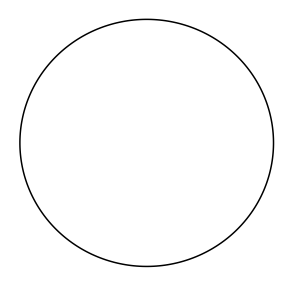

In [ ]:
def circle_equation(x, y):
    return x**2 + y**2 - 1

# Plot the circle in a figure of size 5
plt.figure(figsize=(5, 5))
x = np.linspace(-1.1, 1.1, 100)
y = np.linspace(-1.1, 1.1, 100)
X, Y = np.meshgrid(x, y)
F = circle_equation(X, Y)
plt.contour(X, Y, F, [0], colors='k')
plt.axis('off')
plt.show()

Next, we will plot one equilateral triangle inscribed inside the circle. 

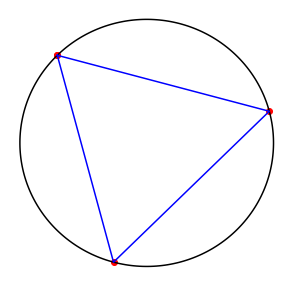

In [3]:
# Calculate the vertices of the equilateral triangle
np.random.seed(42)
theta = np.random.uniform(0, 2 * np.pi)
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  # Closing the triangle
])

# Plot the circle and the equilateral triangle
plt.figure(figsize=(5, 5))
plt.contour(X, Y, F, [0], colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.axis('off')
plt.show()

### First method : 

To have some more interpretable figures, we will use the equilateral triangle inscribed with one node forming an angle of $\frac{\pi}{2}$ inside the trigonometric circle. Now, we will try to get the probability of having a chord with a length superior to $\sqrt{3}$ by randomly plotting a chord of the circle, defined with two randomly choosen points on the border of the circle. This is the first method we will use, that gives a result of $\frac{1}{3}$. 

Indeed, we can fix the first point of the chord by taking one node of the equilateral triangle. Then, the condition we want to verify becomes equal to selecting the second point on the border of the circle, between the two other nodes of the triangle. On an image it becomes clearer : 

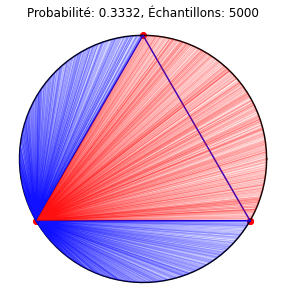

Therefore, it ends up being the probability of choosing a point on the circle that is between two adjacent nodes of the equilateral triangle inscribed in the circle, that is to say $\frac{1}{3}$.

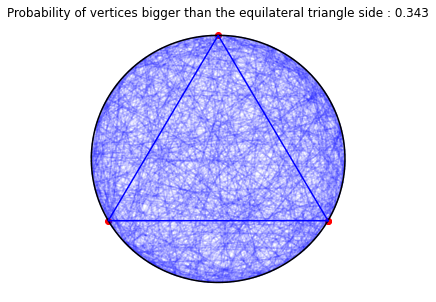

In [4]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  # Closing the triangle
])

# Plot the circle and the equilateral triangle
plt.figure(figsize=(5, 5))

N_MC = 1000
count = 0
for i in range(N_MC):
    theta_bis = np.random.uniform(0, 2 * np.pi)
    theta_third = np.random.uniform(0, 2 * np.pi)
    vertices_MC = np.array([[np.cos(theta_bis), np.sin(theta_bis)], [np.cos(theta_third), np.sin(theta_third)]])
    length = np.sqrt((np.sin(theta_third)-np.sin(theta_bis))**2+(np.cos(theta_third)-np.cos(theta_bis))**2)
    if length >= np.sqrt(3):
        count += 1
    plt.plot(vertices_MC[:, 0], vertices_MC[:, 1], 'b-', alpha=0.1)
plt.contour(X, Y, F, [0], colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.title(f"Probability of vertices bigger than the equilateral triangle side : {count/N_MC}") 
plt.axis('off')
plt.show()

Now let's create a gif that shows the evolution of the plot and the probability, by marking the shorter chords in blue and the chords respecting the desired condition, in red. From now on, we will also try another way of displaying the circle, instead of creating a linspace on x and y, we will only create a linspace on the angle and plot the corresponding point. Those methods are equivalent. 

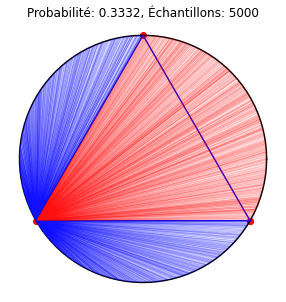

In [ ]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)] 
])

beginning = -5*np.pi/6
N_MC = 5000  
theta_bis_all = np.random.uniform(0, 2 * np.pi, N_MC)
lengths = np.sqrt((np.sin(beginning) - np.sin(theta_bis_all))**2 + (np.cos(beginning) - np.cos(theta_bis_all))**2)
valid = lengths >= np.sqrt(3)

batch_size = 50  
num_batches = N_MC // batch_size

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
ax.axis('off')

theta_circle = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta_circle), np.sin(theta_circle), 'k-')

ax.plot(vertices[:, 0], vertices[:, 1], 'b-')
ax.scatter(vertices[:, 0], vertices[:, 1], color='r')

title = ax.set_title("Probabilité: 0.0000, Échantillons: 0")
count = 0

def animate(i):
    global count, title
    start = i * batch_size
    end = (i + 1) * batch_size
    
    current_theta = theta_bis_all[start:end]
    current_valid = valid[start:end]
    
    segments_valid = []
    segments_invalid = []
    
    for theta_bis, is_valid in zip(current_theta, current_valid):
        x0, y0 = np.cos(beginning), np.sin(beginning)
        x1, y1 = np.cos(theta_bis), np.sin(theta_bis)
        segment = [(x0, y0), (x1, y1)]
        if is_valid:
            segments_valid.append(segment)
        else:
            segments_invalid.append(segment)
    
    if segments_valid:
        ax.add_collection(LineCollection(segments_valid, colors='red', alpha=0.1, linewidths=0.5))
    if segments_invalid:
        ax.add_collection(LineCollection(segments_invalid, colors='blue', alpha=0.1, linewidths=0.5))
    
    count += np.sum(current_valid)
    current_total = end
    prob = count / current_total if current_total > 0 else 0
    title.set_text(f"Probabilité: {prob:.4f}, Échantillons: {current_total}")
    
    return [title]

ani = FuncAnimation(fig, animate, frames=num_batches, init_func=lambda: [title], blit=False, repeat=False)

ani.save('Method_1_chords_animation.gif', writer='pillow', fps=20)

plt.show()

Let's change a bit the visualization by plotting randomly the two points of the chords and not fixing the first one as one node of the triangle. The probability will be less visual but the plot will be more random and will represent better reality.  

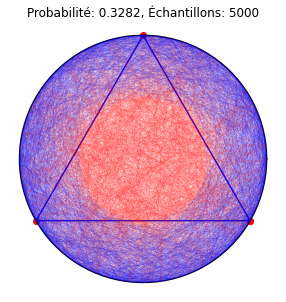

In [ ]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

N_MC = 5000 
theta_bis_all = np.random.uniform(0, 2 * np.pi, N_MC)
theta_third_all = np.random.uniform(0, 2 * np.pi, N_MC)
lengths = np.sqrt((np.sin(theta_third_all) - np.sin(theta_bis_all))**2 + (np.cos(theta_third_all) - np.cos(theta_bis_all))**2)
valid = lengths >= np.sqrt(3)

batch_size = 50 
num_batches = N_MC // batch_size

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
ax.axis('off')

theta_circle = np.linspace(0, 2*np.pi, 100)
ax.plot(np.cos(theta_circle), np.sin(theta_circle), 'k-')

ax.plot(vertices[:, 0], vertices[:, 1], 'b-')
ax.scatter(vertices[:, 0], vertices[:, 1], color='r')

title = ax.set_title("Probabilité: 0.0000, Échantillons: 0")
count = 0

def animate(i):
    global count, title
    start = i * batch_size
    end = (i + 1) * batch_size
    
    current_theta_bis = theta_bis_all[start:end]
    current_theta_third = theta_third_all[start:end]
    current_valid = valid[start:end]
    
    segments_valid = []
    segments_invalid = []
    
    for theta_bis, theta_third, is_valid in zip(current_theta_bis, current_theta_third, current_valid):
        x0, y0 = np.cos(theta_third), np.sin(theta_third)
        x1, y1 = np.cos(theta_bis), np.sin(theta_bis)
        segment = [(x0, y0), (x1, y1)]
        if is_valid:
            segments_valid.append(segment)
        else:
            segments_invalid.append(segment)
    
    if segments_valid:
        ax.add_collection(LineCollection(segments_valid, colors='red', alpha=0.1, linewidths=0.5))
    if segments_invalid:
        ax.add_collection(LineCollection(segments_invalid, colors='blue', alpha=0.1, linewidths=0.5))
    
    count += np.sum(current_valid)
    current_total = end
    prob = count / current_total if current_total > 0 else 0
    title.set_text(f"Probabilité: {prob:.4f}, Échantillons: {current_total}")
    
    return [title]

ani = FuncAnimation(fig, animate, frames=num_batches, init_func=lambda: [title], blit=False, repeat=False)

ani.save('Methods_1_chords_animation_bis.gif', writer='pillow', fps=20)

plt.show()

### Second method : 

If we consider the problem from another perspective, we will arrive to another result ! Now, let's imagine the chord is not defined by two randomly choosen points on the border of the circle, but by its midpoint. Indeed, if we randomly choose a point in the circle (and not limit ourselves with the border this time), we can define a unique chord that has this point as a midpoint. It will be the segment perpendicular to the segment delimited by the center of the circle and the midpoint. 

We can visualize it : 

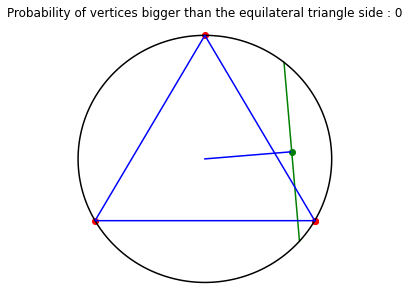

In that case, being longer than the side of the equilateral triangle becomes equivalent to having a midpoint inside the circle inscribed inside that triangle. With a few geometric considerations, we end up finding that this circle has a radius of $\frac{1}{2}$. Let's take a look on a figure : 

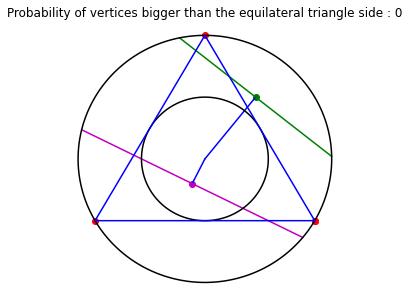

Therefore, the probability we are looking for is the probability of having the midpoint inside a circle of radius half the radius of the big circle. Which gives us the probability of $\frac{1}{4}$ due to the areas ! 

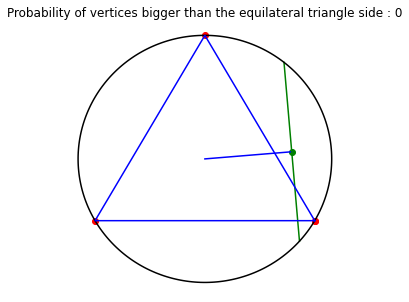

In [ ]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)] 
])

plt.figure(figsize=(5, 5))
def line_equation(x, x_mid, y_mid):
        return (-x_mid / y_mid) * x + y_mid + x_mid**2/y_mid 

def find_intersection_points(x_mid, y_mid):
    # Coefficients of the quadratic equation: ax^2 + bx + c = 0
    if y_mid == 0:
        return (x_mid, np.sqrt(1-x_mid**2)), (x_mid, -np.sqrt(1-x_mid**2))
    a = 1 + (x_mid / y_mid)**2
    b = -2*(y_mid+x_mid**2/y_mid)*x_mid/y_mid
    c = (y_mid+x_mid**2/y_mid)**2 - 1
    
    # Solve the quadratic equation
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        raise ValueError("No real intersection points (should not happen for points inside the circle).")
    
    x1 = (-b + np.sqrt(discriminant)) / (2 * a)
    x2 = (-b - np.sqrt(discriminant)) / (2 * a)
    
    y1 = line_equation(x1, x_mid, y_mid)
    y2 = line_equation(x2, x_mid, y_mid)
    
    return [x1, y1], [x2, y2]

x = np.random.uniform(-1, 1)
y = np.random.uniform(-1, 1)
if x**2 + y**2 <= 1:
    # Calculate the intersection points
    endpoint1, endpoint2 = find_intersection_points(x, y)
    vertices_MC = np.array([[0, 0], [x, y]])
    vertices_Chord = np.array([endpoint1, endpoint2])
    plt.scatter(x, y, color = "g")
    plt.plot(vertices_MC[:, 0], vertices_MC[:, 1], 'b-')
    plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'g-')
plt.contour(X, Y, F, [0], colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.title(f"Probability of vertices bigger than the equilateral triangle side : {0}") 
plt.axis("off")
plt.show()

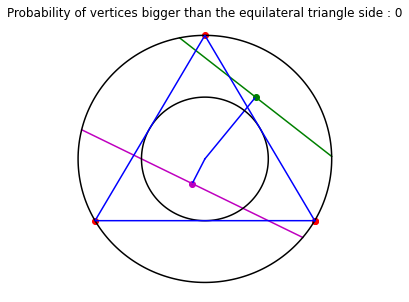

In [18]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

plt.figure(figsize=(5, 5))
def line_equation(x, x_mid, y_mid):
        return (-x_mid / y_mid) * x + y_mid + x_mid**2/y_mid 

def find_intersection_points(x_mid, y_mid):
    # Coefficients of the quadratic equation: ax^2 + bx + c = 0
    if y_mid == 0:
        return (x_mid, np.sqrt(1-x_mid**2)), (x_mid, -np.sqrt(1-x_mid**2))
    a = 1 + (x_mid / y_mid)**2
    b = -2*(y_mid+x_mid**2/y_mid)*x_mid/y_mid
    c = (y_mid+x_mid**2/y_mid)**2 - 1
    
    # Solve the quadratic equation
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        raise ValueError("No real intersection points (should not happen for points inside the circle).")
    
    x1 = (-b + np.sqrt(discriminant)) / (2 * a)
    x2 = (-b - np.sqrt(discriminant)) / (2 * a)
    
    y1 = line_equation(x1, x_mid, y_mid)
    y2 = line_equation(x2, x_mid, y_mid)
    
    return [x1, y1], [x2, y2]

x = 0.4
y = 0.5
x_bis = -0.1
y_bis = -0.2
if x**2 + y**2 <= 1 and x_bis**2 + y_bis**2 <= 1:
    # Calculate the intersection points
    endpoint1, endpoint2 = find_intersection_points(x, y)
    endpoint1_bis, endpoint2_bis = find_intersection_points(x_bis, y_bis)
    vertices_MC = np.array([[0, 0], [x, y]])
    vertices_MC_bis = np.array([[0, 0], [x_bis, y_bis]])
    vertices_Chord = np.array([endpoint1, endpoint2])
    vertices_Chord_bis = np.array([endpoint1_bis, endpoint2_bis])
    plt.scatter(x, y, color = "g")
    plt.scatter(x_bis, y_bis, color = "m")
    plt.plot(vertices_MC[:, 0], vertices_MC[:, 1], 'b-')
    plt.plot(vertices_MC_bis[:, 0], vertices_MC_bis[:, 1], 'b-')
    plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'g-')
    plt.plot(vertices_Chord_bis[:, 0], vertices_Chord_bis[:, 1], 'm-')
plt.contour(X, Y, F, [0], colors='k')
plt.contour(X/2,Y/2,F,[0],colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.title(f"Probability of vertices bigger than the equilateral triangle side : {0}") 
plt.axis("off")
plt.show()

Let's try to get the probability with the Monte-Carlo method just as we did before ! 

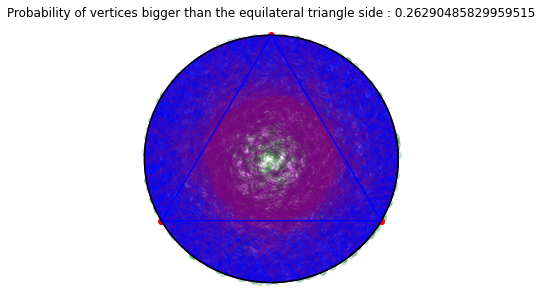

In [13]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

plt.figure(figsize=(5, 5))

N_MC = 5000
count = 0
count_MC = 0
for i in range(N_MC):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
        count_MC += 1 
        vertices_MC = np.array([[0, 0], [x, y]])
        endpoint1, endpoint2 = find_intersection_points(x, y)
        vertices_Chord = np.array([endpoint1, endpoint2])
        length = np.sqrt((endpoint2[0]-endpoint1[0])**2+(endpoint2[1]-endpoint1[1])**2)
        plt.scatter(x, y, color = "g", alpha = 0.2)
        if length >= np.sqrt(3):
            count += 1
            plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'r-', alpha=0.1)
        plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'b-', alpha=0.1)
plt.contour(X, Y, F, [0], colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.title(f"Probability of vertices bigger than the equilateral triangle side : {count/count_MC}") 
plt.axis("off")
plt.show()

We can see that the distribution of the chords is different than with the first method, showing us that the definition of the chord is the problem in Bertrand's paradox ! Indeed, the center of the circle is less colored due to less chords crossing it with that new definition. 

As before, let's visualize the plot through a gif ! 

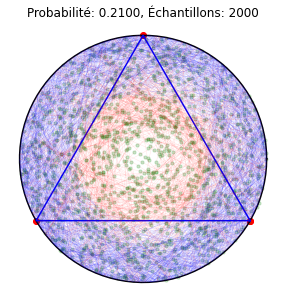

In [ ]:
theta = -np.pi / 6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

N_MC = 2000  
batch_size = 50  
num_batches = N_MC // batch_size

def random_point_in_circle(size):
    points = np.random.uniform(-1, 1, (size, 2))
    norms = np.linalg.norm(points, axis=1)
    return points[norms <= 1]

def line_equation(x, x_mid, y_mid):
    if y_mid == 0:
        return np.full_like(x, np.nan)  
    return (-x_mid / y_mid) * x + y_mid + x_mid**2 / y_mid

def find_intersection_points(x_mid, y_mid):
    if y_mid == 0:
        return (x_mid, np.sqrt(1 - x_mid**2)), (x_mid, -np.sqrt(1 - x_mid**2))
    a = 1 + (x_mid / y_mid)**2
    b = -2 * (y_mid + x_mid**2 / y_mid) * (x_mid / y_mid)
    c = (y_mid + x_mid**2 / y_mid)**2 - 1
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        raise ValueError("No real intersection points (should not happen for points inside the circle).")
    x1 = (-b + np.sqrt(discriminant)) / (2 * a)
    x2 = (-b - np.sqrt(discriminant)) / (2 * a)
    y1 = line_equation(x1, x_mid, y_mid)
    y2 = line_equation(x2, x_mid, y_mid)
    return [x1, y1], [x2, y2]

midpoints = random_point_in_circle(N_MC)

lengths = np.array([np.linalg.norm(np.array(p1) - np.array(p2)) for p1, p2 in [find_intersection_points(x, y) for x, y in midpoints]])
valid = lengths >= np.sqrt(3)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
ax.axis('off')

theta_circle = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(theta_circle), np.sin(theta_circle), 'k-')

ax.plot(vertices[:, 0], vertices[:, 1], 'b-')
ax.scatter(vertices[:, 0], vertices[:, 1], color='r')

title = ax.set_title("Probabilité: 0.0000, Échantillons: 0")
count = 0

def animate(i):
    global count, title
    start = i * batch_size
    end = (i + 1) * batch_size
    
    current_midpoints = midpoints[start:end]
    current_valid = valid[start:end]
    
    segments_valid = []
    segments_invalid = []
    
    for (x_mid, y_mid), is_valid in zip(current_midpoints, current_valid):
        endpoint1, endpoint2 = find_intersection_points(x_mid, y_mid)
        segment = [endpoint1, endpoint2]
        if is_valid:
            segments_valid.append(segment)
        else:
            segments_invalid.append(segment)
        ax.scatter(x_mid, y_mid, color='green', s=10, alpha=0.2)

    if segments_valid:
        ax.add_collection(LineCollection(segments_valid, colors='red', alpha=0.1, linewidths=0.5))
    if segments_invalid:
        ax.add_collection(LineCollection(segments_invalid, colors='blue', alpha=0.1, linewidths=0.5))

    count += np.sum(current_valid)
    current_total = end
    prob = count / current_total if current_total > 0 else 0
    title.set_text(f"Probabilité: {prob:.4f}, Échantillons: {current_total}")
    
    return [title]

ani = FuncAnimation(fig, animate, frames=num_batches, init_func=lambda: [title], blit=False, repeat=False)

ani.save('Methods_2_chords_animation.gif', writer='pillow', fps=20)

plt.show()

A bigger N_MC would render a better Monte-Carlo simulation but would be too computional expensive for the creation of the gif... 

### Third method : 

Finally, let's try a last approach ! We will now consider that we will randomly choose a radius of the circle, then randomly a point on this radius. Like this : 

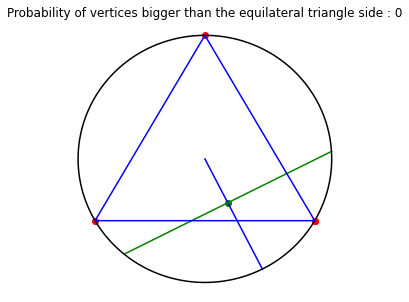

It becomes clear that if the point is between 0 and half of the radius, the chords having this point as a midpoint will respect our condition. Between the half and the end of the radius, it is however too short. We can visualize it : 

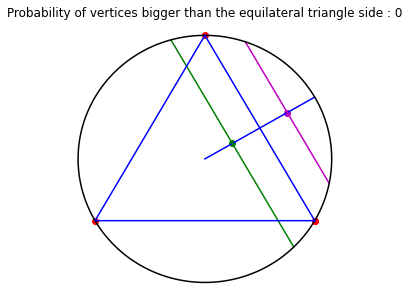

Therefore, our probability ends up being the probability of choosing a random point on a radius between the center of the circle and the half of the radius. Which gives us $\frac{1}{2}$. 

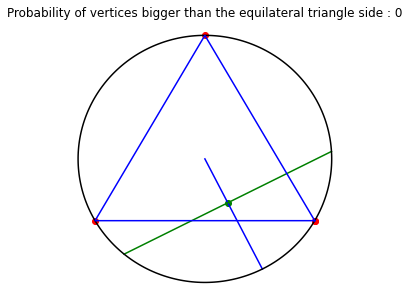

In [24]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

plt.figure(figsize=(5, 5))

theta = np.random.uniform(0, 2*np.pi)
radius = np.random.uniform(0, 1)    
x_mid = radius * np.cos(theta)
y_mid = radius * np.sin(theta)
endpoint1, endpoint2 = find_intersection_points(x_mid, y_mid)
vertices_MC = np.array([[0, 0], [np.cos(theta), np.sin(theta)]])
vertices_Chord = np.array([endpoint1, endpoint2])
plt.scatter(x_mid, y_mid, color = "g")
plt.plot(vertices_MC[:, 0], vertices_MC[:, 1], 'b-')
plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'g-')
plt.contour(X, Y, F, [0], colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.title(f"Probability of vertices bigger than the equilateral triangle side : {0}") 
plt.axis("off")
plt.show()

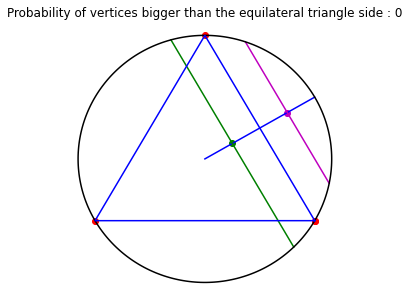

In [29]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

plt.figure(figsize=(5, 5))

theta = np.pi/6
radius = np.random.uniform(0, 1)    
x_mid_1 = 1/4 * np.cos(theta)
y_mid_1 = 1/4 * np.sin(theta)
x_mid_2 = 3/4 * np.cos(theta)
y_mid_2 = 3/4 * np.sin(theta)
endpoint1, endpoint2 = find_intersection_points(x_mid_1, y_mid_1)
endpoint1_bis, endpoint2_bis = find_intersection_points(x_mid_2, y_mid_2)

vertices_MC = np.array([[0, 0], [np.cos(theta), np.sin(theta)]])
vertices_Chord = np.array([endpoint1, endpoint2])
vertices_Chord_bis = np.array([endpoint1_bis, endpoint2_bis])
plt.scatter(x_mid_1, y_mid_1, color = "g")
plt.scatter(x_mid_2, y_mid_2, color = "m")
plt.plot(vertices_MC[:, 0], vertices_MC[:, 1], 'b-')
plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'g-')
plt.plot(vertices_Chord_bis[:, 0], vertices_Chord_bis[:, 1], 'm-')
plt.contour(X, Y, F, [0], colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.title(f"Probability of vertices bigger than the equilateral triangle side : {0}") 
plt.axis("off")
plt.show()

Now let's simulate it with Monte-Carlo ! 

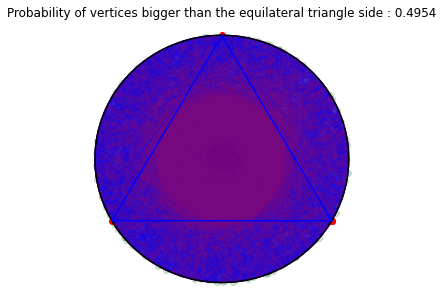

In [30]:
theta = -np.pi/6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

plt.figure(figsize=(5, 5))

N_MC = 5000
count = 0
count_MC = 0
for i in range(N_MC):
    theta = np.random.uniform(0, 2*np.pi)
    radius = np.random.uniform(0, 1)    
    x_mid = radius * np.cos(theta)
    y_mid = radius * np.sin(theta)
    endpoint1, endpoint2 = find_intersection_points(x_mid, y_mid)
    vertices_MC = np.array([[0, 0], [np.cos(theta), np.sin(theta)]])
    vertices_Chord = np.array([endpoint1, endpoint2])
    length = np.sqrt((endpoint2[0]-endpoint1[0])**2+(endpoint2[1]-endpoint1[1])**2)
    plt.scatter(x_mid, y_mid, color = "g", alpha = 0.2)
    if length >= np.sqrt(3):
        count += 1
        plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'r-', alpha=0.1)
    plt.plot(vertices_Chord[:, 0], vertices_Chord[:, 1], 'b-', alpha=0.1)
plt.contour(X, Y, F, [0], colors='k')
plt.plot(vertices[:, 0], vertices[:, 1], 'b-')
plt.scatter(vertices[:, 0], vertices[:, 1], color='r')
plt.title(f"Probability of vertices bigger than the equilateral triangle side : {count/N_MC}") 
plt.axis("off")
plt.show()

We can see that the distribution is again different in the center ! Which explains the probability's difference... Let's now plot the gif to finish.

In [ ]:
theta = -np.pi / 6
vertices = np.array([
    [np.cos(theta), np.sin(theta)],
    [np.cos(theta + 2 * np.pi / 3), np.sin(theta + 2 * np.pi / 3)],
    [np.cos(theta + 4 * np.pi / 3), np.sin(theta + 4 * np.pi / 3)],
    [np.cos(theta), np.sin(theta)]  
])

N_MC = 2000  
batch_size = 50  
num_batches = N_MC // batch_size

def line_equation(x, x_mid, y_mid):
    if y_mid == 0:
        return np.full_like(x, np.nan)  
    return (-x_mid / y_mid) * x + y_mid + x_mid**2 / y_mid

def find_intersection_points(x_mid, y_mid):
    if y_mid == 0:
        return (x_mid, np.sqrt(1 - x_mid**2)), (x_mid, -np.sqrt(1 - x_mid**2))
    a = 1 + (x_mid / y_mid)**2
    b = -2 * (y_mid + x_mid**2 / y_mid) * (x_mid / y_mid)
    c = (y_mid + x_mid**2 / y_mid)**2 - 1
    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        raise ValueError("No real intersection points (should not happen for points inside the circle).")
    x1 = (-b + np.sqrt(discriminant)) / (2 * a)
    x2 = (-b - np.sqrt(discriminant)) / (2 * a)
    y1 = line_equation(x1, x_mid, y_mid)
    y2 = line_equation(x2, x_mid, y_mid)
    return [x1, y1], [x2, y2]

theta_all = np.random.uniform(0, 2 * np.pi, N_MC)
radius_all = np.random.uniform(0, 1, N_MC)
x_mid_all = radius_all * np.cos(theta_all)
y_mid_all = radius_all * np.sin(theta_all)

endpoint1 = []
endpoint2 = []
for x_mid, y_mid in zip(x_mid_all, y_mid_all):
    p1, p2 = find_intersection_points(x_mid, y_mid)
    endpoint1.append(p1)
    endpoint2.append(p2)
endpoint1 = np.array(endpoint1)
endpoint2 = np.array(endpoint2)

lengths = np.linalg.norm(endpoint1 - endpoint2, axis=1)
valid = lengths >= np.sqrt(3)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
ax.axis('off')

theta_circle = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(theta_circle), np.sin(theta_circle), 'k-')

ax.plot(vertices[:, 0], vertices[:, 1], 'b-')
ax.scatter(vertices[:, 0], vertices[:, 1], color='r')

title = ax.set_title("Probabilité: 0.0000, Échantillons: 0")
count = 0

def animate(i):
    global count, title
    start = i * batch_size
    end = (i + 1) * batch_size
    
    current_x_mid = x_mid_all[start:end]
    current_y_mid = y_mid_all[start:end]
    current_endpoint1 = endpoint1[start:end]
    current_endpoint2 = endpoint2[start:end]
    current_valid = valid[start:end]
    
    segments_valid = []
    segments_invalid = []
    
    for j in range(len(current_x_mid)):
        segment = [current_endpoint1[j], current_endpoint2[j]]
        if current_valid[j]:
            segments_valid.append(segment)
        else:
            segments_invalid.append(segment)
        
        ax.scatter(current_x_mid[j], current_y_mid[j], color='green', s=10, alpha=0.2)
    
    if segments_valid:
        ax.add_collection(LineCollection(segments_valid, colors='red', alpha=0.1, linewidths=0.5))
    if segments_invalid:
        ax.add_collection(LineCollection(segments_invalid, colors='blue', alpha=0.1, linewidths=0.5))
    
    count += np.sum(current_valid)
    current_total = end
    prob = count / current_total if current_total > 0 else 0
    title.set_text(f"Probabilité: {prob:.4f}, Échantillons: {current_total}")
    
    return [title]

ani = FuncAnimation(fig, animate, frames=num_batches, init_func=lambda: [title], blit=False, repeat=False)

ani.save('chords_animation.gif', writer='pillow', fps=20)

plt.show()